```
Jenny Zeng  
52082740  
zhaohuaz@uci.edu  
```

In [1]:
%pylab inline
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load data
import mltools as ml
from logisticClassify2 import *
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

# Problem 1: Perceptrons and Logistic Regression
## (a) Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not.

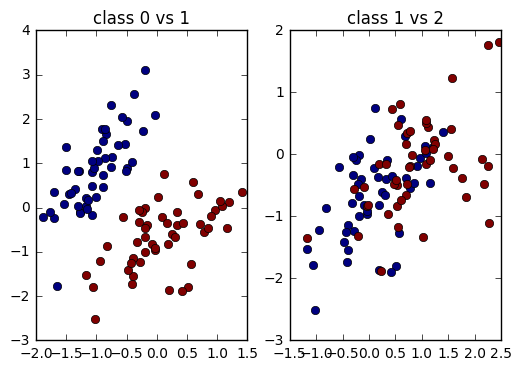

In [4]:
fig = plt.figure()
fig.add_subplot(121)
ml.plot.plotClassify2D(None, XA, YA)
plt.title("class 0 vs 1")

fig.add_subplot(122)
ml.plot.plotClassify2D(None, XB, YB)
plt.title("class 1 vs 2")
plt.show()

Since data set 1 is separated clearly into two different colors, and there exists a straight line that can separate the two classes in feature space, data set 1 is linearly separable. In data set 2, because two classes are overlap and there are same observation values under both classes, data set2 is not linearly separable.

## (b) Write (fill in) the function plotBoundary(...) 
in logisticClassify2.py to compute the
points on the decision boundary.

In [ ]:
### plotBoundary function in logisticClassify2.py:

    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); 
        ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
         # find x2 values as a function of x1's values
        x2b = [(self.theta[0]+self.theta[1]*x1)/ \
               (-self.theta[2]) for x1 in x1b];
        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0];                                              # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',\
                 X[-A,0],X[-A,1],'r.',x1b,x2b,'k-');
        plt.axis(ax); plt.draw();


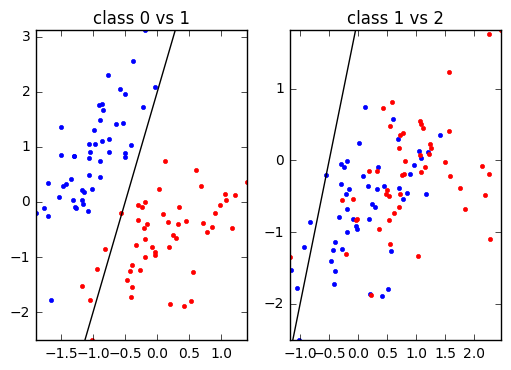

In [6]:
learner = logisticClassify2(); # create "blank" learner

theta0 = 0.5
theta1 = 1
theta2 = -0.25
wts = np.array([theta0,theta1,theta2]);
learner.theta = wts; # set the learner's parameters
fig = plt.figure()
fig.add_subplot(121)
# define class labels using YA or YB
learner.classes = np.unique(YA) 
plt.title("class 0 vs 1")
learner.plotBoundary(XA,YA)
fig.add_subplot(122)
plt.title("class 1 vs 2")
learner.classes = np.unique(YB)
learner.plotBoundary(XB,YB)
plt.show()

## (c) Complete the logisticClassify2.predict function to make predictions for your linear classifier.

In [ ]:
### predict function in logisticClassify2

    def predict(self, X):
        """ Return the predictied class of each data point in X"""

        ## compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        Yhat = [None]*np.size(X,0)
        for i in range(len(Yhat)):
            Yhat[i] = self.theta[0] + \
                self.theta[1]*X[i,0]+self.theta[2]*X[i,1]
            ## if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]\
            if Yhat[i] > 0:
                Yhat[i] = self.classes[1]
            ## else predict class 0:  Yhat[i] = self.classes[0]
            else:
                Yhat[i] = self.classes[0]

        return np.array(Yhat)

In [7]:
learner.classes = np.unique(YA)
errA = learner.err(XA, YA)
learner.classes = np.unique(YB)
errB = learner.err(XB, YB)
print("error rate on A: ", errA)
print("error rate on B: ", errB)

error rate on A:  0.0505050505051
error rate on B:  0.464646464646


## (d) Verify that your predict code matches your boundary plot 
by using plotClassify2D with your manually constructed learner on the two data sets.

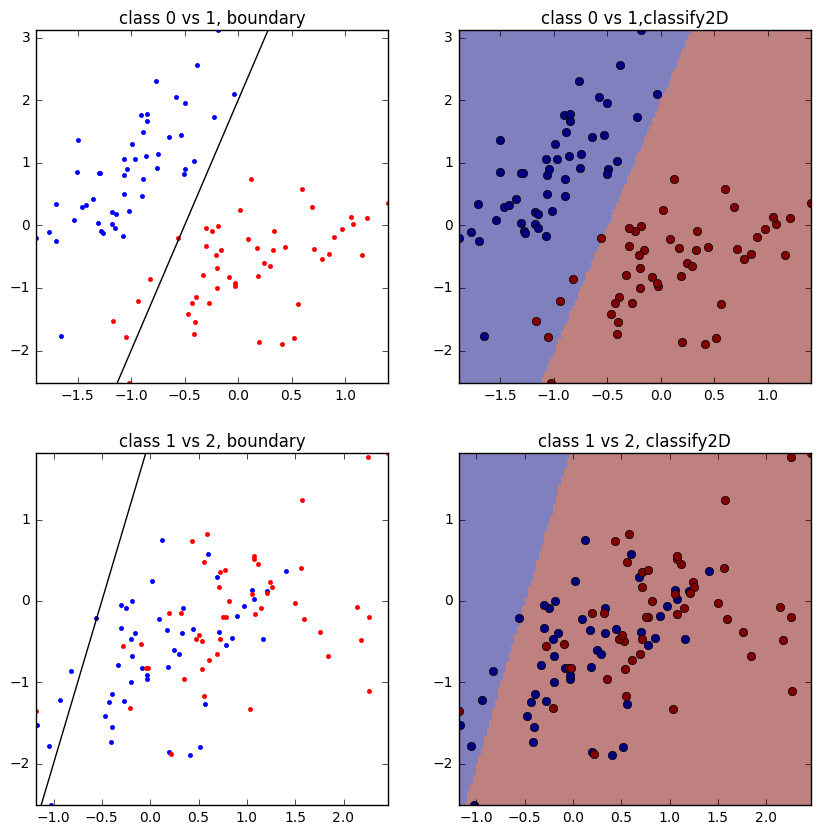

In [8]:
fig = plt.figure(figsize=(10,10))
learner.classes = np.unique(YA)
fig.add_subplot(221)
plt.title("class 0 vs 1, boundary")
learner.plotBoundary(XA,YA)
ax = plt.axis()
fig.add_subplot(222)
plt.title("class 0 vs 1,classify2D")
plt.axis(ax)
ml.plot.plotClassify2D(learner, XA, YA)

learner.classes = np.unique(YB)
fig.add_subplot(223)
plt.title("class 1 vs 2, boundary")
learner.plotBoundary(XB,YB)
ax = plt.axis()
fig.add_subplot(224)
plt.title("class 1 vs 2, classify2D")
plt.axis(ax)
ml.plot.plotClassify2D(learner, XB, YB)
plt.show()

**Answer**: By comparing the figure of boundary and the figure of classify 2D, I can verify that the resulting decision boundary matches the one I computed analytically.

### (e) Derive the gradient of the negative log likelihood $J_j$ for logistic regression, and give it in your report.

first we can derive the $\sigma$
\begin{eqnarray*}
\sigma (z) &=&(1 + exp(-z))^{-1}\\
\partial \sigma (z)&=& \sigma(z)(1-\sigma(z))
\end{eqnarray*}


\begin{eqnarray*}
 J_j(\theta) &=& -y^{(j)} \log \sigma (x^{(j)}\theta^T ) - (1 - y^{(j)})\log(1 -\sigma(x^{(j)}\theta^T ))\\
\partial J_j(\theta) &=& -y^{(j)}\cdot \frac{1}{\sigma(x^{(j)}\theta^T)}\cdot \partial(\sigma(x^{(j)} \theta^T)) \cdot x^{(j)}_1 - (1-y^{(j)})\cdot \frac{1}{(1-\sigma(x^{(j)}\theta^T))} \cdot \partial(1-\sigma (x^{(j)}\theta^T)) \cdot x^{(j)}_1\\
&=& -y^{(j)}\cdot (1-\sigma(x^{(j)}\theta^T))\cdot x^{(j)} + (1-y^{(j)})\cdot \sigma (x^{(j)}\theta^T)\cdot x^{(j)}_1
\end{eqnarray*}

## (f) Complete your train(...) function to perform stochastic gradient descent on the logistic loss function
(1) computing the surrogate loss function at each epoch $(J = \frac{1}{m}\sum J_j$ , from the previous part);

In [ ]:
### functions I wrote in logisticClassify2.py:

    def sig(self, z):  # logistic sigmoid
        return 1.0 / (1.0 + np.exp(-z)) # in [0,1]

    def dsig(self, z):  # its derivative at z
        return self.sig(z) * (1 - self.sig(z))

    def gradient(self,xi, yi, ri):
        return -yi *(1-self.sig(ri))*xi + \
            (1-yi)*self.sig(ri)*xi
    
    def surrogateLoss(self, yi, ri):
        return -yi*np.log(self.sig(ri)) - \
            (1-yi)*np.log(1-self.sig(ri))
    
    def train(self, X, Y, initStep=1.0, stopTol=1e-4,
              stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X))   # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: 
            self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[]; 
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            Jsur = 0
            for i in np.random.permutation(M):
                ri    = XX[i].dot(self.theta.T)     # linear response r(x)
                # Yhat = np.sign(ri );
                gradi = self.gradient(XX[i], YY[i],ri);     # gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                Jsur += self.surrogateLoss(YY[i], ri)
            J01.append( self.err(X,Y) )  # evaluate the current error rate 

            ## compute surrogate loss (logistic negative log-likelihood)

            Jsur = Jsur/M
            Jnll.append( Jsur) #evaluate the current NLL loss
            plt.figure(1);
            plt.plot(Jnll,'b-',J01,'r-');
            plt.title("convergence of surrogate loss and error rate ")
            plt.draw();    # plot losses
            if N==2:
                plt.figure(2);
                plt.title("the boundary change in training")
                self.plotBoundary(X,Y);
                plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            # check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch > stopEpochs or 
                    ( epoch > 1 and abs(Jnll[-1] - Jnll[-2])< stopTol); 
            # or if Jnll not changing between epochs ( < stopTol )

## (g) Run your logistic regression classifier on both data sets (A and B).

data set A result


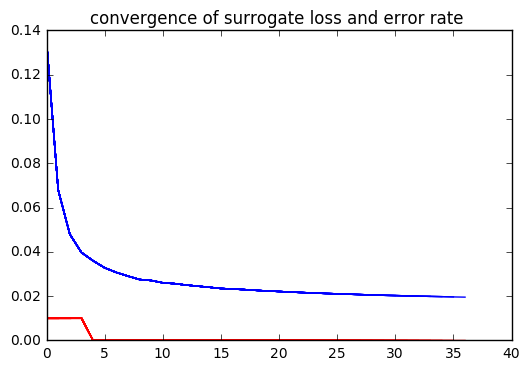

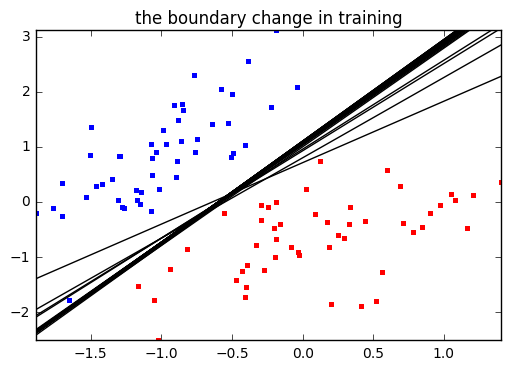

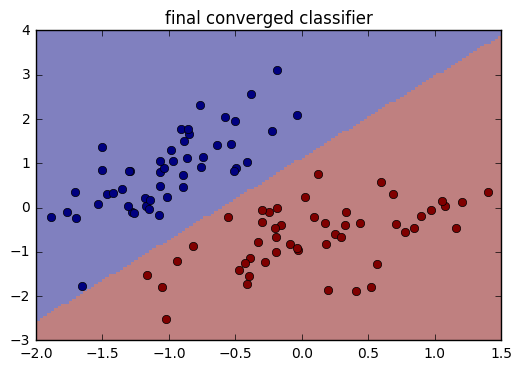

In [9]:
# for data set A
print("data set A result")
learner.classes = np.unique(YA)
learner.train(XA, YA,initStep=1.0, stopEpochs = 40)
# stopEpochs = 40 because it always stop after 40 epochs 
# and we can get err rate = 0 result
plt.show()
plt.title("final converged classifier")
ml.plot.plotClassify2D(learner, XA, YA)
plt.show()

data set B result


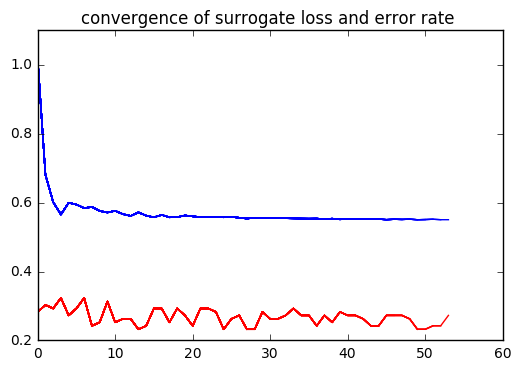

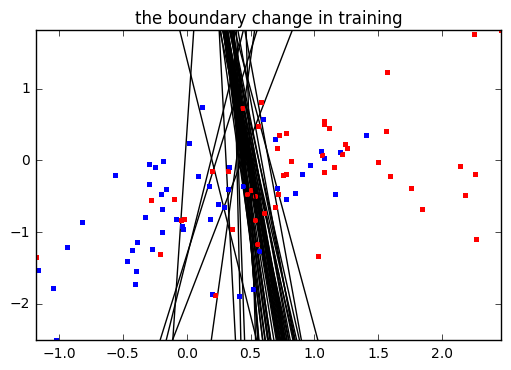

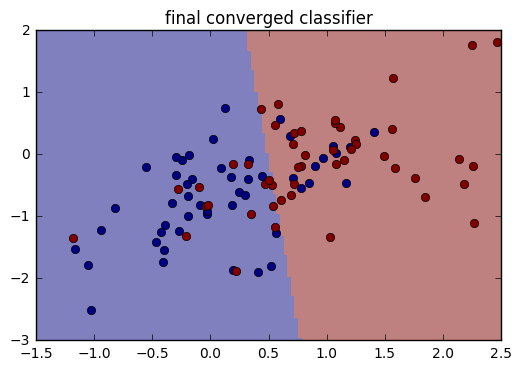

In [10]:
# for data set B
print("data set B result")
learner.classes = np.unique(YB)
learner.train(XB, YB,initStep=1.0, stopEpochs = 100)
plt.show()
plt.title("final converged classifier")
ml.plot.plotClassify2D(learner, XB, YB)
plt.show()

## (h)Extra Credit (15pt): Add an L2 regularization term $(\alpha \sum_i \theta_i^2)$ to your surrogate loss function, and update the gradient and your code to reflect this addition.

After adding the regularization term, the learner has larger surrogate loss, and the result becomes worse. It also takes more epochs before it stops. From the data set B result, it shows that it has smoother error rate change. When the alpha is so big, (e.g. alpha=2), the learner becomes so hard to improve.

In [ ]:
## changes in logisticClassify2 class

# 1. add self.alpha in init.
class logisticClassify2(ml.classifier):
    def __init__(self, *args, **kwargs):
        self.classes = [0,1]              # (default to 0/1; replace during training)
        self.theta = np.array([])         # placeholder value before training
        self.alpha = 0 # add alpha
        if len(args) or len(kwargs):      # if we were given optional arguments,
            self.train(*args,**kwargs)    #  just pass them through to "train"

# 2. add + 2*self.alpha*np.sum(self.theta) at the end of the gradient
    def gradient(self,xi, yi, ri):
        return -yi *(1-self.sig(ri))*xi + (1-yi)*self.sig(ri)*xi \
               + 2*self.alpha*np.sum(self.theta)

# 3. add + np.sum(self.alpha*np.dot(self.theta, self.theta))
#   at the end of the surrogate loss
    def surrogateLoss(self, yi, ri):
        return -yi*np.log(self.sig(ri)) - (1-yi)*np.log(1-self.sig(ri)) \
               + np.sum(self.alpha*np.dot(self.theta, self.theta))


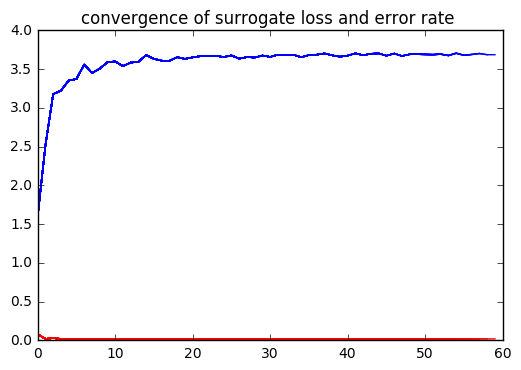

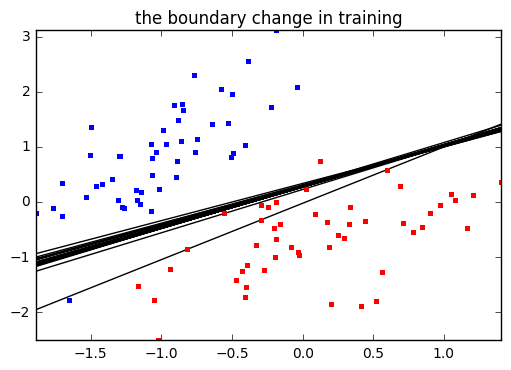

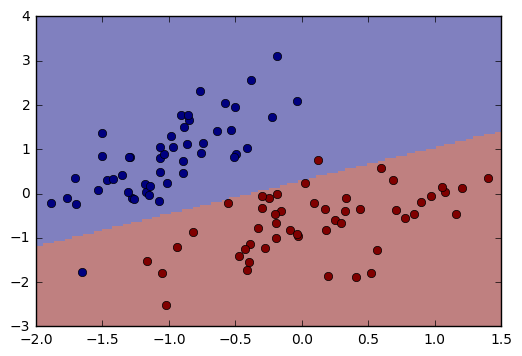

added alpha= 2 for data set A


In [11]:
learner.alpha = 0.1
learner.classes = np.unique(YA)
learner.train(XA,YA,initStep=1.0, stopEpochs = 100)
plt.show()
ml.plot.plotClassify2D(learner, XA, YA)
plt.show()
print("added alpha= 2 for data set A")

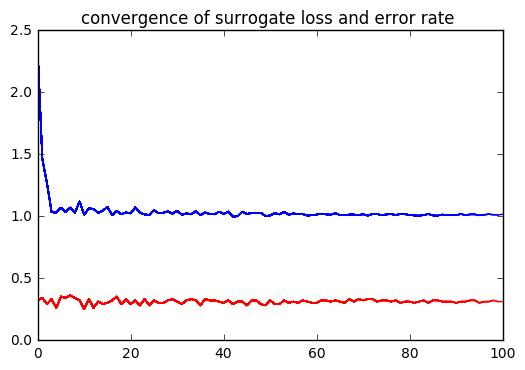

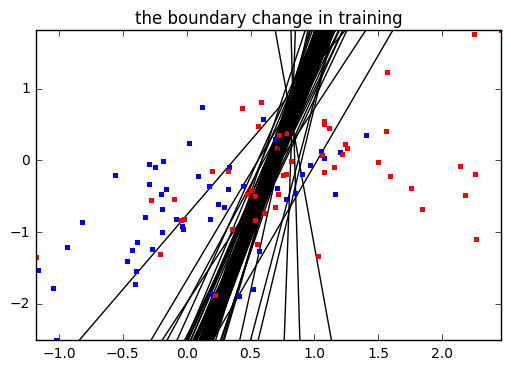

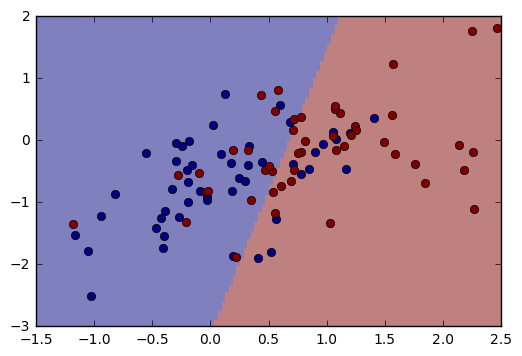

added alpha = 2 for data set B


In [12]:
learner.alpha = 0.1
learner.classes = np.unique(YB)
learner.train(XB,YB,initStep=1.0, stopEpochs = 100)
plt.show()
ml.plot.plotClassify2D(learner, XB, YB)
plt.show()
print("added alpha = 2 for data set B")

# Problem 2: Shattering and VC Dimension

## (a) $T(a+bx_1)$
It will get a vertical line $x1 = a/b$,
it can shatter example a, b. 

1. For example a, there is only one points, so the line can be at the left of the point or the right of it. 

2. For example b, if those two points are the same class, the vertical line can be at $x_1<2$ or $x_1 > 1$ (b-2). If they are two different classes, then the vertical line could be between the two points:$2<x_1<4$ (b-1)

3. For example c, if the point at (2,2) and the point at (6,4) are the same class while the one at the middle (4,8) is different class, it is not able to shatter it. Same for example d.

Therefore, the learner a can shatter example a and b. Its vcdim = 2

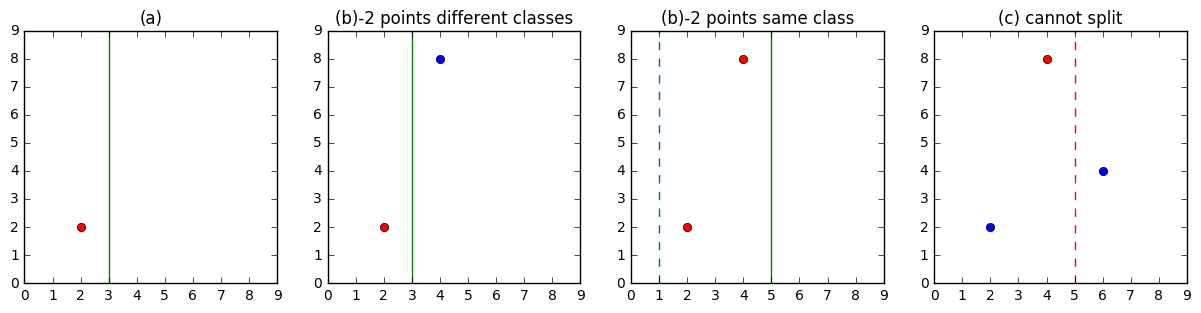

In [23]:
ax = (0,9,0,9)
fig = plt.figure(figsize=(15,15))
fig.add_subplot(441)
plt.plot([2],[2],'ro')
plt.plot([3,3],[0,9],'g')
plt.title("(a)")
plt.axis(ax)
fig.add_subplot(442)
plt.plot([2],[2],'ro')
plt.plot([4],[8],'bo')
plt.plot([3,3],[0,9],'g')
plt.title("(b)-2 points different classes")
plt.axis(ax)
fig.add_subplot(443)
plt.plot([2,4],[2,8],'ro')
plt.plot([5,5],[0,9],'g')
plt.plot([1,1],[0,9],'g--')
plt.title("(b)-2 points same class")
plt.axis(ax)
fig.add_subplot(444)
plt.plot([2,6],[2,4],'bo')
plt.plot([4],[8],'ro')
plt.plot([5,5],[0,9],'r--')
plt.title("(c) cannot split")
plt.axis(ax)
plt.show()

#blue: +1, red: -1

## (b) $T((x_1-a)^2 + (x_2-b)^2 +c)$

It will form a circle centered at (a,b). If c < 0, points in the circle will be -1. As $x_1$ or $x_2$ increase, T will be close to 0 and gradually we get +1 outside of the circle. If c>=0, we will always get +1. 

It can shatter example a, b, c

1. from what we discussed in the class, a zero-centered circle vcdim >=1, same for learner b when a=0 and b=0. It can shatter example a.

2. for example b, if one of the point is -1, and the other is +1, we can circle the -1 point and leave the other one out of the circle. If both of them are -1, we circle both of them in the circle, otherwise, both of them are not in the circle.

2. For example c, if all points are +1, circle will group none of them; if three points are all -1, they can be shattered by groupping all of them into the circle. If one of them is -1, we can group that one into the circle and leave other points out of the circle. If 2 of them are -1, we can still shatter them. 

3. For example d, if (2,2) and (8,7) are -1, we cannot find a circle that can separate them.

Thus, the learner b can shatter example a,b,c and its vcdim = 3

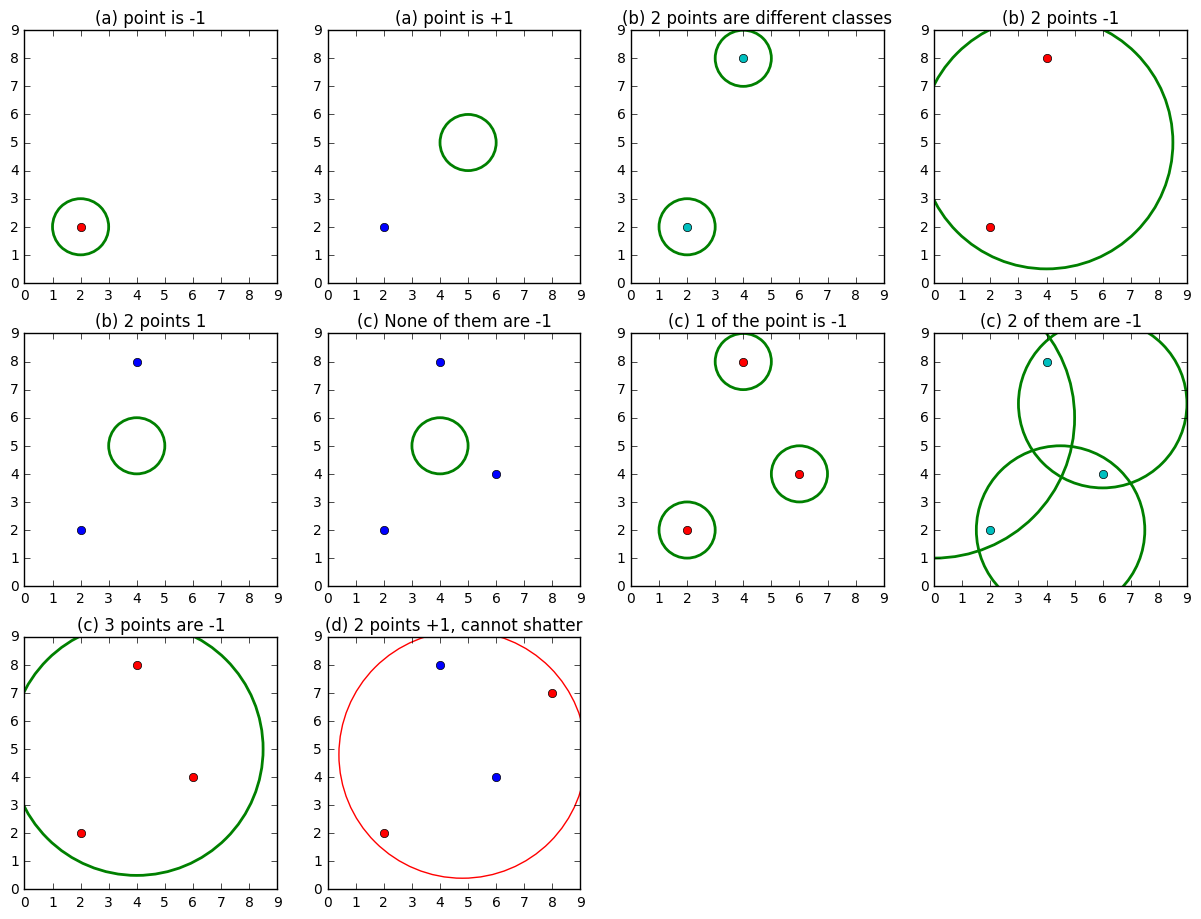

In [24]:
ax = (0,9,0,9)
fig = plt.figure(figsize=(15,15))
fig.add_subplot(441)
plt.plot([2],[2],'ro')
plt.gca().add_artist(
    plt.Circle((2, 2), 1, color='g',fill=False,
               linewidth=2))
plt.title("(a) point is -1")
plt.axis(ax)

fig.add_subplot(442)
plt.plot([2],[2],'bo')
plt.gca().add_artist(
    plt.Circle((5, 5), 1, color='g',fill=False,
               linewidth=2))
plt.title("(a) point is +1")
plt.axis(ax)

fig.add_subplot(443)
plt.plot([2],[2],'co')
plt.plot([4],[8],'co')
plt.gca().add_artist(
    plt.Circle((2, 2), 1, color='g',fill=False,
               linewidth=2))
plt.gca().add_artist(
    plt.Circle((4, 8), 1, color='g',fill=False,
               linewidth=2))
plt.title("(b) 2 points are different classes")
plt.axis(ax)

fig.add_subplot(444)
plt.plot([2,4],[2,8],'ro')
plt.gca().add_artist(
    plt.Circle((4, 5), 4.5, color='g',fill=False,
               linewidth=2))
plt.title("(b) 2 points -1")
plt.axis(ax)

fig.add_subplot(445)
plt.plot([2,4],[2,8],'bo')
plt.gca().add_artist(
    plt.Circle((4, 5), 1, color='g',fill=False,
               linewidth=2))
plt.title("(b) 2 points 1")
plt.axis(ax)

fig.add_subplot(446)
plt.plot([2,6,4],[2,4,8],'bo')
plt.gca().add_artist(
    plt.Circle((4, 5), 1, color='g',fill=False,
               linewidth=2))
plt.title("(c) None of them are -1")
plt.axis(ax)

fig.add_subplot(447)
plt.plot([2,6],[2,4],'ro')
plt.plot([4],[8],'ro')
plt.gca().add_artist(
    plt.Circle((4, 8),1, color='g',fill=False,
               linewidth=2))
plt.gca().add_artist(
    plt.Circle((2, 2),1, color='g',fill=False,
               linewidth=2))
plt.gca().add_artist(
    plt.Circle((6, 4),1, color='g',fill=False,
               linewidth=2))
plt.title("(c) 1 of the point is -1")
plt.axis(ax)

fig.add_subplot(448)
plt.plot([2,6,4],[2,4,8],'co')
plt.gca().add_artist(
    plt.Circle((6, 6.5), 3, color='g',fill=False,
               linewidth=2))
plt.gca().add_artist(
    plt.Circle((4.5, 2), 3, color='g',fill=False,
               linewidth=2))
plt.gca().add_artist(
    plt.Circle((0, 6), 5, color='g',fill=False,
               linewidth=2))
plt.title("(c) 2 of them are -1")
plt.axis(ax)

fig.add_subplot(449)
plt.plot([2,6,4],[2,4,8],'ro')
plt.gca().add_artist(
    plt.Circle((4, 5), 4.5, color='g',fill=False,
               linewidth=2))
plt.title("(c) 3 points are -1")
plt.axis(ax)

fig.add_subplot(4,4,10)
plt.plot([6, 4],[4, 8],'bo')
plt.plot([2, 8],[2, 7],'ro')
plt.gca().add_artist(
    plt.Circle((4.8, 4.8), 4.4, color='r',fill=False,
               linewidth=1))
plt.title("(d) 2 points +1, cannot shatter")
plt.axis(ax)

plt.show()

## (c) $T((a*b)x_1 + (c/a)x_2)$

It can form a 2 dimensional line that will cross the point(0,0). Points on different side of the line is different class. It can shatter example a,b

1. for example a, it can be at the left or the right of the point. 

2. for example b, if two points are different class, it can cross through the middle of these two points and split them. If two points are the same class, it can be at the left/right of those two points.

2. for example c, if points (4,8),(6,4) are +1 and point(2,2) is -1, we cannot find a line that can shatter properly.

Its vcdim = 3

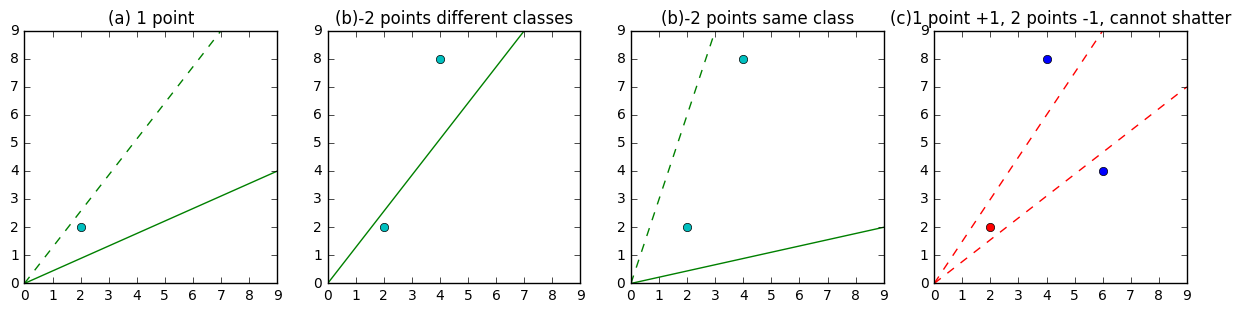

In [21]:
ax = (0,9,0,9)
fig = plt.figure(figsize=(15,15))

fig.add_subplot(441)
plt.plot([2],[2],'co')
plt.plot([0,9],[0,4],'g')
plt.plot([0,7],[0,9],'g--')
plt.title("(a) 1 point")
plt.axis(ax)

fig.add_subplot(442)
plt.plot([2],[2],'co')
plt.plot([4],[8],'co')
plt.plot([0,7],[0,9],'g')
plt.title("(b)-2 points different classes")
plt.axis(ax)

fig.add_subplot(443)
plt.plot([2,4],[2,8],'co')
plt.plot([0,9],[0,2],'g')
plt.plot([0,3],[0,9],'g--')
plt.title("(b)-2 points same class")
plt.axis(ax)

fig.add_subplot(444)
plt.plot([2],[2],'ro')
plt.plot([4,6],[8, 4],'bo')
plt.plot([0,9],[0,7],'r--')
plt.plot([0,6],[0,9],'r--')
plt.title("(c)1 point +1, 2 points -1, cannot shatter")
plt.axis(ax)

plt.show()